In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# from IPython.display import display
import cv2 # is used for to perform task on images
# from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
# make variable and store it in the variable
with_mask = os.listdir('/Users/kamakshiojha/Documents/Machine_Learning_projects/Mask_Detection/data/with_mask')
without_mask = os.listdir('/Users/kamakshiojha/Documents/Machine_Learning_projects/Mask_Detection/data/without_mask')

In [3]:
print(with_mask[0:5])

['with_mask_2140.jpg', 'with_mask_1449.jpg', 'with_mask_2626.jpg', 'with_mask_942.jpg', 'with_mask_3538.jpg']


In [4]:
print(without_mask[-5:])

['without_mask_2870.jpg', 'without_mask_2858.jpg', 'without_mask_2680.jpg', 'without_mask_1389.jpg', 'without_mask_2694.jpg']


In [5]:
print("image with mask : ", len(with_mask))
print("image without mask : ", len(without_mask))

image with mask :  3726
image without mask :  3829


In [6]:
#creating labels (with mask = 1, without mask = 0)

with_mask_label = [1]*3725
without_mask_label = [0]*3828

In [7]:
print(with_mask_label[0:5])

[1, 1, 1, 1, 1]


In [8]:
labels = with_mask_label + without_mask_label

In [9]:
print(len(labels))

7553


In [10]:
#display image

img = mpimg.imread('/Users/kamakshiojha/Documents/Machine_Learning_projects/Mask_Detection/data/with_mask/with_mask_2140.jpg')

<function matplotlib.pyplot.show(close=None, block=None)>

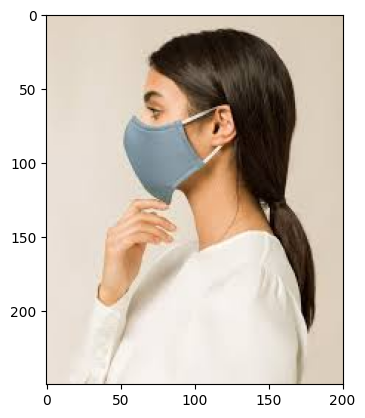

In [11]:
imgplot = plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

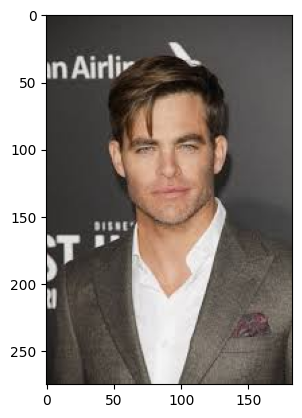

In [12]:
#display image

img = mpimg.imread('/Users/kamakshiojha/Documents/Machine_Learning_projects/Mask_Detection/data/without_mask/without_mask_2870.jpg')
imgplot = plt.imshow(img)
plt.show

In [13]:
#image processing
# 1. resize images , 2. convert images to numpy array

In [19]:
from PIL import Image
import numpy as np
import os

with_mask_path = '/Users/kamakshiojha/Documents/Machine_Learning_projects/Mask_Detection/data/with_mask/'
with_mask = os.listdir(with_mask_path)

data = []

for img_file in with_mask:
    img_path = os.path.join(with_mask_path, img_file)

    # Skip directories
    if os.path.isfile(img_path):
        image = Image.open(img_path)
        image = image.resize((128, 128))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)

without_mask_path = '/Users/kamakshiojha/Documents/Machine_Learning_projects/Mask_Detection/data/without_mask/'
without_mask = os.listdir(without_mask_path)

for img_file in without_mask:
    img_path = os.path.join(without_mask_path, img_file)

    # Skip directories
    if os.path.isfile(img_path):
        image = Image.open(img_path)
        image = image.resize((128, 128))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)


In [20]:
len(data)

7553

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# to convert image and label lists to numpy array

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
print(X.shape)

(7553, 128, 128, 3)


In [25]:
Y_new = tf.keras.utils.to_categorical(
    Y, num_classes=2, dtype='float32'
)

In [26]:
print(Y_new)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [27]:
#split the data into training and testing

X_train,X_test ,Y_train ,Y_test = train_test_split(X,Y_new,test_size = 0.2, random_state = 2)  

In [28]:
print(X_train.shape,X_test.shape ,Y_train.shape ,Y_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3) (6042, 2) (1511, 2)


In [29]:
#scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

#scaling is done to range values in/btw 0 - 1 instead of 0 - 255
#black  = 0, 1 = white

In [30]:
X_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[219, 221, 233],
        [219, 221, 233],
        [218, 220, 232],
        ...,
        [243, 246, 255],
        [243, 246, 255],
        [243, 246, 255]],

       [[217, 219, 231],
        [217, 219, 231],
        [216, 218, 230],
        ...,
        [243, 246, 255],
        [243, 246, 255],
        [243, 246, 255]],

       [[216, 218, 230],
        [216, 218, 230],
        [215, 217, 229],
        ...,
        [243, 246, 255],
        [243, 246, 255],
        [243, 246, 255]]

In [31]:
print(X_train_scaled[0])

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[0.85882353 0.86666667 0.91372549]
  [0.85882353 0.86666667 0.91372549]
  [0.85490196 0.8627451  0.90980392]
  ...
  [0.95294118 0.96470588 1.        ]
  [0.95294118 0.96470588 1.        ]
  [0.95294118 0.96470588 1.        ]]

 [[0.85098039 0.85882353 0.90588235]
  [0.85098039 0.85882353 0.90588235]


In [32]:
#building CCN

import tensorflow as tf
from tensorflow import keras

In [33]:
# tensorflow and pytorch are the two libraries for building a model
# tensorflow library was developed by google and keras is just a wrapper for this library
# pytorch is developed by facebook

In [34]:
num_of_class = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size =(3,3), activation = 'relu', input_shape = (128,128,3) ))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64, kernel_size =(3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())  #single dimensional data

#Dense layers:
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))#no overfitting arises

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_class, activation = 'sigmoid')) 
#sigmoid is used in binary class classification
#softmax is used for multiclass classification

In [35]:
# #compile the model
# model.compile(
#     optimizer = 'adam',
#     loss = 'catergorical_crossentropy',#for classification
#     metrics = ['acc']
# )

from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [36]:
model.summary()

# Train the model
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [37]:
print(history.history)

{'loss': [0.471638947725296, 0.31321799755096436, 0.2709095776081085, 0.22197242081165314, 0.1977759301662445], 'accuracy': [0.7884863018989563, 0.881184458732605, 0.8922199606895447, 0.9089571237564087, 0.9249586462974548], 'val_loss': [0.31405356526374817, 0.2880202531814575, 0.2482200711965561, 0.24506235122680664, 0.23410078883171082], 'val_accuracy': [0.8727272748947144, 0.8694214820861816, 0.8842975497245789, 0.8975206613540649, 0.8958677649497986]}


In [38]:
#model evaluation


loss,accuracy = model.evaluate(X_test_scaled, Y_test)
print("Accuracy" , accuracy)

48/48 [==============================] - 1s 30ms/step - loss: 0.1702 - accuracy: 0.9285
Accuracy 0.9285241365432739


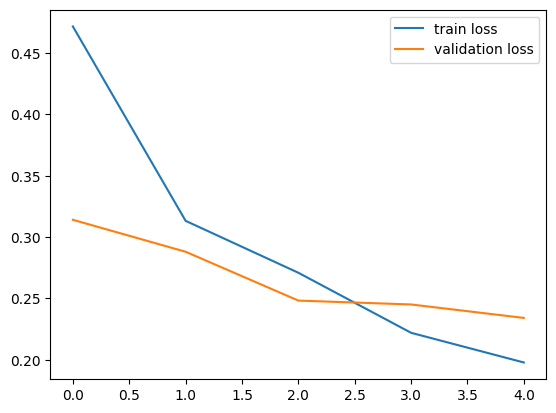

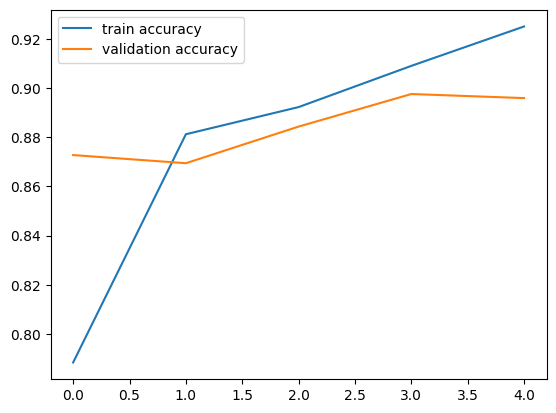

In [39]:
h = history

plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label = 'train accuracy')
plt.plot(h.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted:  /Users/kamakshiojha/Documents/Machine_Learning_projects/Mask_Detection/data/with_mask/with_mask_1002.jpg


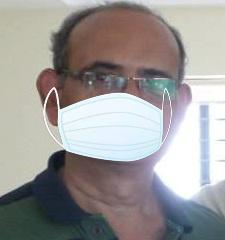

1/1 [==============================] - 0s 73ms/step
Model Output Probabilities: [[0.47575027 0.5104226 ]]
Predicted Class Label: 1
The person in the image is wearing a mask


In [41]:
input_image_path = input('Path of the image to be predicted: ')

# Load the image
input_image = cv2.imread(input_image_path)
image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
display(Image.fromarray(image_rgb))

# Resize and preprocess the image
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

# Make predictions
input_predict = model.predict(input_image_reshaped)
print("Model Output Probabilities:", input_predict)

# Get the predicted class
input_predict_label = np.argmax(input_predict)
print("Predicted Class Label:", input_predict_label)

threshold = 0.5  # You can adjust this threshold
if input_predict[0][1] > threshold:  # Assuming 1 is the index for 'wearing mask' class
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')
